# Setting Up Necessary Things

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# %cd /content/drive/MyDrive/MasterCourseML/week-10 - Building Neural Networks with PyTorch/Lecture 40 - Tabular Data Analysis and Feature Extraction

[Errno 2] No such file or directory: '/content/drive/MyDrive/MasterCourseML/week-10 - Building Neural Networks with PyTorch/Lecture 40 - Tabular Data Analysis and Feature Extraction'
/content/drive/MyDrive/MasterCourseML/week-10


# Data Analysis And Feature Extraction

In [10]:
# df = pd.read_csv("/content/drive/MyDrive/MasterCourseML/week-10/adult.csv")
# df.head()

In [11]:
!gdown 1QXTCcNhRjcPiyyWoYwkxHF5KnVgsCSJT

Downloading...
From: https://drive.google.com/uc?id=1QXTCcNhRjcPiyyWoYwkxHF5KnVgsCSJT
To: /content/drive/MyDrive/MasterCourseML/week-10/adult.csv
100% 5.33M/5.33M [00:00<00:00, 126MB/s]


In [12]:
df = pd.read_csv("adult.csv")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [13]:
df.shape

(48842, 15)

In [14]:
df.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


### Continuous Attributes

In [19]:
df.describe(include=(np.number))       #include=(np.number) tells pandas to take only numeric column for summary from dataset. same thing works default also

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


<Axes: >

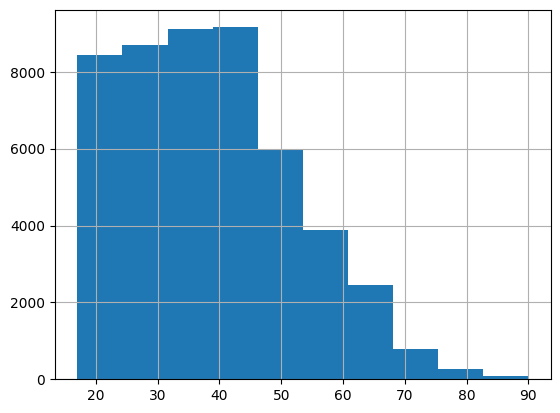

In [20]:
df['age'].hist()

<Axes: >

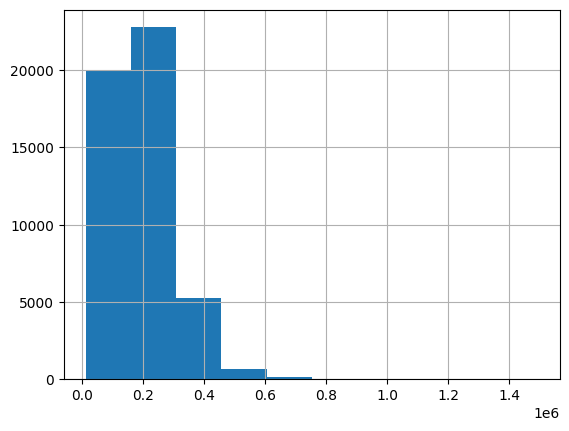

In [21]:
df['fnlwgt'].hist()

<Axes: >

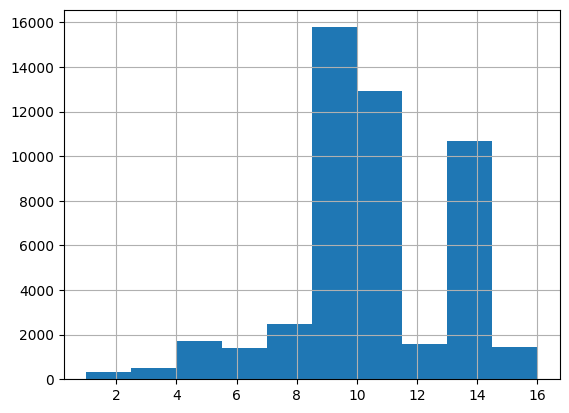

In [22]:
df['educational-num'].hist()

<Axes: >

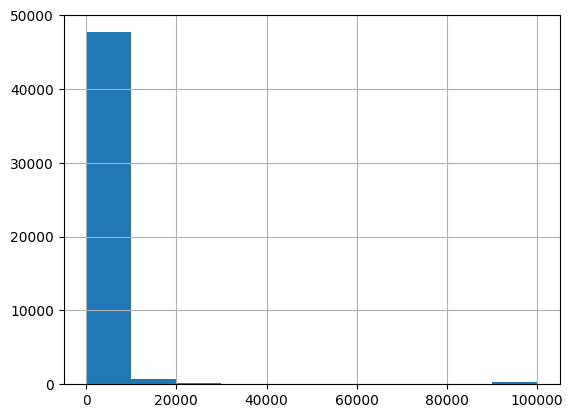

In [23]:
df['capital-gain'].hist()

**log transformation (np.log()):**
* Here log transformation is used on the 'capital-gain' column and store the result in a new column called 'log-capital-gain'.
* It handles the skewed data
* A dataset is skewed when its distribution is not symmetric
* Most values are concentrated on one side, while a few extreme values stretch the distribution in one direction.
* Right (Positive) Skew: most values are small, but a few are very large.
* Left (Negative) Skew: Tail extends to the left (e.g., age at death)
* Log, square root, or Box-Cox transformation can help normalize the data to fix the skewed dataset
* Log transformation helps to normalize the distribution, making it closer to a normal (Gaussian) distribution, which is useful for machine learning models.
* If capital-gain contains 0, applying np.log(0) would cause an error (log(0) is undefined). In that case, adding 1 ensures there are no zero values.

In [24]:
df['log-capital-gain'] = np.log(df['capital-gain'] + 1)

<Axes: >

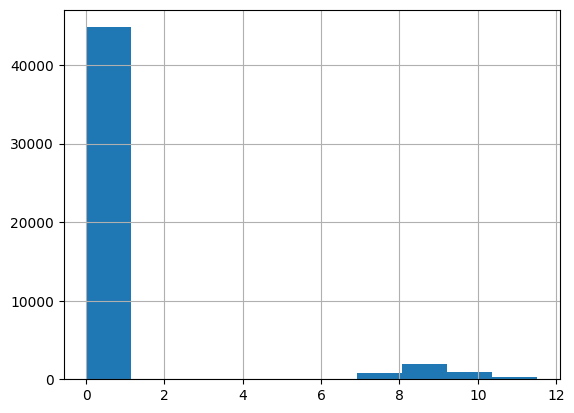

In [25]:
df['log-capital-gain'].hist()

<Axes: >

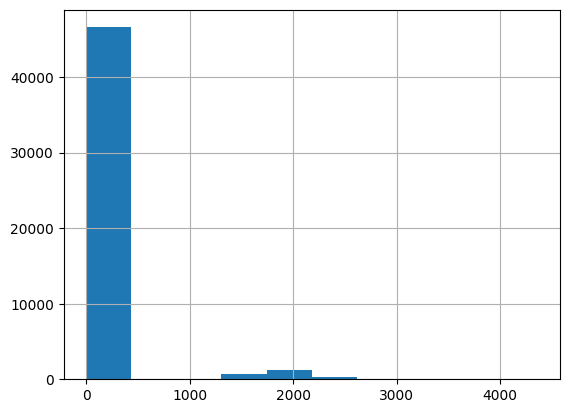

In [26]:
df['capital-loss'].hist()

In [29]:
df['log-capital-loss'] = np.log(df['capital-loss'] + 1)

<Axes: >

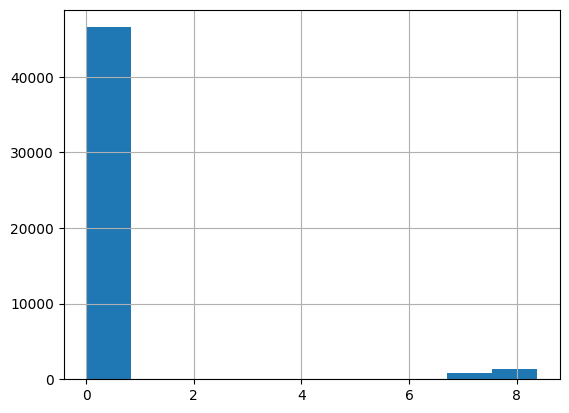

In [30]:
df['log-capital-loss'].hist()

<Axes: >

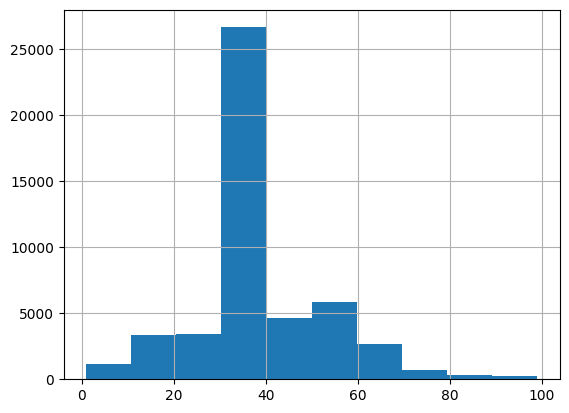

In [31]:
df['hours-per-week'].hist()

### Categorical Attributes

In [32]:
df['workclass'].value_counts()

,count
workclass,
Private,33906
Self-emp-not-inc,3862
Local-gov,3136
?,2799
State-gov,1981
Self-emp-inc,1695
Federal-gov,1432
Without-pay,21
Never-worked,10


**Private Workclass is much more than others, so we can consider Private and Non-Private as two classes**

In [33]:
df['private_workclass'] = (df['workclass'] == "Private")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,log-capital-gain,log-capital-loss,private_workclass
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0.000000,0.0,True
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0.000000,0.0,True
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,0.000000,0.0,False
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,8.947546,0.0,True
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K,0.000000,0.0,False


In [34]:
df['education'].value_counts()

,count
education,
HS-grad,15784
Some-college,10878
Bachelors,8025
Masters,2657
Assoc-voc,2061
11th,1812
Assoc-acdm,1601
10th,1389
7th-8th,955


**Let's divide it into 3 classes: post_grad, after High School, School**

In [35]:
post_grad_levels = ["Masters", "Doctorate"]
post_grad_status = []
for idx, row in df.iterrows():
  if row['education'] in post_grad_levels:
    post_grad_status.append(1)
  else:
    post_grad_status.append(0)

df['postgrad_education'] = post_grad_status
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,log-capital-gain,log-capital-loss,private_workclass,postgrad_education
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0.000000,0.0,True,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0.000000,0.0,True,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,0.000000,0.0,False,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,8.947546,0.0,True,0
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K,0.000000,0.0,False,0


In [36]:
af_HS_levels = ["Bachelors", "Assoc-acdm", "Some-college", "Prof-school", "Assoc-voc", "HS-grad"]
af_HS_status = []
for idx, row in df.iterrows():
  if row['education'] in af_HS_levels:
    af_HS_status.append(1)
  else:
    af_HS_status.append(0)

df['after_HS_education'] = af_HS_status
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,log-capital-gain,log-capital-loss,private_workclass,postgrad_education,after_HS_education
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0.000000,0.0,True,0,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0.000000,0.0,True,0,1
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,0.000000,0.0,False,0,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,8.947546,0.0,True,0,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K,0.000000,0.0,False,0,1


In [37]:
school_levels = ["12th", "11th", "10th", "9th", "7th-8th", "5th-6th", "1st-4th", "Preschool"]
school_status = []
for idx, row in df.iterrows():
  if row['education'] in school_levels:
    school_status.append(1)
  else:
    school_status.append(0)

df['school_education'] = school_status
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,...,capital-loss,hours-per-week,native-country,income,log-capital-gain,log-capital-loss,private_workclass,postgrad_education,after_HS_education,school_education
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,...,0,40,United-States,<=50K,0.000000,0.0,True,0,0,1
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,...,0,50,United-States,<=50K,0.000000,0.0,True,0,1,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,...,0,40,United-States,>50K,0.000000,0.0,False,0,1,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,...,0,40,United-States,>50K,8.947546,0.0,True,0,1,0
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,...,0,30,United-States,<=50K,0.000000,0.0,False,0,1,0


**Let's simplify it to married and unmarried**

In [38]:
df['marital-status'].value_counts()

,count
marital-status,
Married-civ-spouse,22379
Never-married,16117
Divorced,6633
Separated,1530
Widowed,1518
Married-spouse-absent,628
Married-AF-spouse,37


In [39]:
married_levels = ["Married-civ-spouse", "Married-spouse-absent", "Married-AF-spouse"]
married_status = []
for idx, row in df.iterrows():
  if row['marital-status'] in married_levels:
    married_status.append(1)
  else:
    married_status.append(0)

df['married'] = married_status
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,...,hours-per-week,native-country,income,log-capital-gain,log-capital-loss,private_workclass,postgrad_education,after_HS_education,school_education,married
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,...,40,United-States,<=50K,0.000000,0.0,True,0,0,1,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,...,50,United-States,<=50K,0.000000,0.0,True,0,1,0,1
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,...,40,United-States,>50K,0.000000,0.0,False,0,1,0,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,...,40,United-States,>50K,8.947546,0.0,True,0,1,0,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,...,30,United-States,<=50K,0.000000,0.0,False,0,1,0,0


**We will divide the occupations into 4 categories: white_collar, blue_collar, service, others**

In [ ]:
df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [40]:
occupations = {
    "Prof-specialty": "white_collar",
    "Craft-repair": "blue_collar",
    "Exec-managerial": "white_collar",
    "Adm-clerical": "white_collar",
    "Sales": "white_collar",
    "Other-service": "service",
    "Machine-op-inspct": "blue_collar",
    "?": "others",
    "Transport-moving": "blue_collar",
    "Handlers-cleaners": "blue_collar",
    "Farming-fishing": "blue_collar",
    "Tech-support": "white_collar",
    "Protective-serv": "blue_collar",
    "Priv-house-serv": "service",
    "Armed-Forces": "others"
}

occupation_category = [occupations[row['occupation']] for idx, row in df.iterrows()]
df['occupation_cat'] = occupation_category
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,...,native-country,income,log-capital-gain,log-capital-loss,private_workclass,postgrad_education,after_HS_education,school_education,married,occupation_cat
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,...,United-States,<=50K,0.000000,0.0,True,0,0,1,0,blue_collar
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,...,United-States,<=50K,0.000000,0.0,True,0,1,0,1,blue_collar
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,...,United-States,>50K,0.000000,0.0,False,0,1,0,1,blue_collar
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,...,United-States,>50K,8.947546,0.0,True,0,1,0,1,blue_collar
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,...,United-States,<=50K,0.000000,0.0,False,0,1,0,0,others


In [41]:
df = pd.get_dummies(df, columns=["occupation_cat"])
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,...,log-capital-loss,private_workclass,postgrad_education,after_HS_education,school_education,married,occupation_cat_blue_collar,occupation_cat_others,occupation_cat_service,occupation_cat_white_collar
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,...,0.0,True,0,0,1,0,True,False,False,False
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,...,0.0,True,0,1,0,1,True,False,False,False
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,...,0.0,False,0,1,0,1,True,False,False,False
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,...,0.0,True,0,1,0,1,True,False,False,False
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,...,0.0,False,0,1,0,0,False,True,False,False


**cannot be more fine-grained**

In [42]:
df['relationship'].value_counts()

,count
relationship,
Husband,19716
Not-in-family,12583
Own-child,7581
Unmarried,5125
Wife,2331
Other-relative,1506


In [43]:
df = pd.get_dummies(df, columns=["relationship"])
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,race,gender,capital-gain,...,occupation_cat_blue_collar,occupation_cat_others,occupation_cat_service,occupation_cat_white_collar,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Black,Male,0,...,True,False,False,False,False,False,False,True,False,False
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,White,Male,0,...,True,False,False,False,True,False,False,False,False,False
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,White,Male,0,...,True,False,False,False,True,False,False,False,False,False
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Black,Male,7688,...,True,False,False,False,True,False,False,False,False,False
4,18,?,103497,Some-college,10,Never-married,?,White,Female,0,...,False,True,False,False,False,False,False,True,False,False


**Most of them are white. So will go with white and non-white**

In [44]:
df['race'].value_counts()

,count
race,
White,41762
Black,4685
Asian-Pac-Islander,1519
Amer-Indian-Eskimo,470
Other,406


In [45]:
df['race_white'] = (df['race'] == "White")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,race,gender,capital-gain,...,occupation_cat_others,occupation_cat_service,occupation_cat_white_collar,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_white
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Black,Male,0,...,False,False,False,False,False,False,True,False,False,False
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,White,Male,0,...,False,False,False,True,False,False,False,False,False,True
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,White,Male,0,...,False,False,False,True,False,False,False,False,False,True
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Black,Male,7688,...,False,False,False,True,False,False,False,False,False,False
4,18,?,103497,Some-college,10,Never-married,?,White,Female,0,...,True,False,False,False,False,False,True,False,False,True


**same for gender**

In [46]:
df['gender'].value_counts()

,count
gender,
Male,32650
Female,16192


In [47]:
df['gender_male'] = (df['gender'] == "Male")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,race,gender,capital-gain,...,occupation_cat_service,occupation_cat_white_collar,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_white,gender_male
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Black,Male,0,...,False,False,False,False,False,True,False,False,False,True
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,White,Male,0,...,False,False,True,False,False,False,False,False,True,True
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,White,Male,0,...,False,False,True,False,False,False,False,False,True,True
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Black,Male,7688,...,False,False,True,False,False,False,False,False,False,True
4,18,?,103497,Some-college,10,Never-married,?,White,Female,0,...,False,False,False,False,False,True,False,False,True,False


**Most of them are from US. So will go with US and non-US**

In [48]:
df['native-country'].value_counts()

,count
native-country,
United-States,43832
Mexico,951
?,857
Philippines,295
Germany,206
Puerto-Rico,184
Canada,182
El-Salvador,155
India,151


In [49]:
df['country_US'] = (df['native-country'] == "United-States")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,race,gender,capital-gain,...,occupation_cat_white_collar,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_white,gender_male,country_US
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Black,Male,0,...,False,False,False,False,True,False,False,False,True,True
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,White,Male,0,...,False,True,False,False,False,False,False,True,True,True
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,White,Male,0,...,False,True,False,False,False,False,False,True,True,True
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Black,Male,7688,...,False,True,False,False,False,False,False,False,True,True
4,18,?,103497,Some-college,10,Never-married,?,White,Female,0,...,False,False,False,False,True,False,False,True,False,True


**This is the target. Let's categorize into high or low income**

In [50]:
df['income'].value_counts()

,count
income,
<=50K,37155
>50K,11687


In [51]:
df['high_income'] = (df['income'] == ">50K")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,race,gender,capital-gain,...,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_white,gender_male,country_US,high_income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Black,Male,0,...,False,False,False,True,False,False,False,True,True,False
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,White,Male,0,...,True,False,False,False,False,False,True,True,True,False
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,White,Male,0,...,True,False,False,False,False,False,True,True,True,True
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Black,Male,7688,...,True,False,False,False,False,False,False,True,True,True
4,18,?,103497,Some-college,10,Never-married,?,White,Female,0,...,False,False,False,True,False,False,True,False,True,False


In [52]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income',
       'log-capital-gain', 'log-capital-loss', 'private_workclass',
       'postgrad_education', 'after_HS_education', 'school_education',
       'married', 'occupation_cat_blue_collar', 'occupation_cat_others',
       'occupation_cat_service', 'occupation_cat_white_collar',
       'relationship_Husband', 'relationship_Not-in-family',
       'relationship_Other-relative', 'relationship_Own-child',
       'relationship_Unmarried', 'relationship_Wife', 'race_white',
       'gender_male', 'country_US', 'high_income'],
      dtype='object')

# Split data and store everything

In [53]:
df = df[['age', 'fnlwgt', 'educational-num', 'hours-per-week',
       'log-capital-gain', 'log-capital-loss', 'private_workclass',
       'postgrad_education', 'after_HS_education', 'school_education',
       'married', 'occupation_cat_blue_collar', 'occupation_cat_others',
       'occupation_cat_service', 'occupation_cat_white_collar',
       'relationship_Husband', 'relationship_Not-in-family',
       'relationship_Other-relative', 'relationship_Own-child',
       'relationship_Unmarried', 'relationship_Wife', 'race_white',
       'gender_male', 'country_US', 'high_income']]

df.head()

,age,fnlwgt,educational-num,hours-per-week,log-capital-gain,log-capital-loss,private_workclass,postgrad_education,after_HS_education,school_education,...,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_white,gender_male,country_US,high_income
0,25,226802,7,40,0.000000,0.0,True,0,0,1,...,False,False,False,True,False,False,False,True,True,False
1,38,89814,9,50,0.000000,0.0,True,0,1,0,...,True,False,False,False,False,False,True,True,True,False
2,28,336951,12,40,0.000000,0.0,False,0,1,0,...,True,False,False,False,False,False,True,True,True,True
3,44,160323,10,40,8.947546,0.0,True,0,1,0,...,True,False,False,False,False,False,False,True,True,True
4,18,103497,10,30,0.000000,0.0,False,0,1,0,...,False,False,False,True,False,False,True,False,True,False


* random_state = 42: takes same data randomely (reproducibility) in every time when we use same number of
* When set to a fixed number (e.g., 42), it ensures that the random splitting, shuffling, or selection produces the same results every time.

**Why Use random_state=42?**
1. Ensures consistency → Running the same code multiple times gives the same results.
2. Useful for debugging → You can compare models without worrying about different random splits.
3. Makes research reproducible → Others can replicate your work using the same seed.

**why stratify?**
1. The parameter stratify=df.high_income in train_test_split() ensures that the train and test sets maintain the same proportion of classes as in the original dataset.
2. Helps when dealing with imbalanced datasets.
3. Ensures that both train and test sets have the same class distribution.
4. Prevents models from being biased due to an unequal distribution of classes.

In [54]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state = 42, stratify=df.high_income)
len(df), len(train_df), len(test_df)

(48842, 39073, 9769)

In [56]:
#train dataset
48842 * .8

39073.6

In [57]:
#test dataset
48842 *.2

9768.4

In [58]:
train_df.to_csv("adult_train.csv", index=False)
test_df.to_csv("adult_test.csv", index=False)